<a href="https://colab.research.google.com/github/JoeAM11/MachineLearning_EM23/blob/main/Tarea08_MachineLearning_MetricosDesempe%C3%B1o_Enero_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🤖 📓
# Tarea #08
#### Nombre :Joel Alejandro Rodarte Rivera 
#### Matrícula: 2173260

El siguiente cuaderno contiene:

* Métricas de desempeño basados en la tarea 06 y 07 

* Árboles de desición
  * Accuracy
  * Presicion
  * Recall
  * F1-score

* Regresión Logística
  * Matríz de confusión 
  * Curva ROC





## Regresión Logística

In [7]:
! git clone https://github.com/JoeAM11/MachineLearning_EM23.git
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


fatal: destination path 'MachineLearning_EM23' already exists and is not an empty directory.


In [25]:
import pandas as pd


In [26]:
# Train = 3445 pacientes - 70%
# Test  = 1475 pacientes - 30%

df_test = pd.read_csv('/content/MachineLearning_EM23/Tarea06_ML_Febrero_AprendizajeSupervisado/Testing_Tarea06.csv') 
df_train = pd.read_csv('/content/MachineLearning_EM23/Tarea06_ML_Febrero_AprendizajeSupervisado/training_Tarea06.csv') 

In [27]:
 #Preparar data frame de training y testing 

# Sacar todas las X del dataframe de train; Quitar prognosis
x_train = df_train.drop('prognosis', axis=1)
# Sacar la variable de respuesta del data frame de train, en este caso prognosis
y_train = df_train.prognosis

# Preparar data frame de testing; mismo paso anterior pero con la matriz de test  
x_test = df_test.drop('prognosis', axis=1)
y_test = df_test.prognosis

# Fit del modelo con los datos de entrenamiento 
clf = LogisticRegression()
clf.fit(x_train, y_train)

# Accuracy is defined as the number of correct predictions divided by the total number of predictions made by the model. It is a measure of how well the model is able to classify the data correctly.
# Comparar la prediccion del modelo contra el resultado real  

y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Se obtuvo un accuracy de 1.0, lo cual quiere decir que para todos las pacientes que tienne diabetes, según sus síntomas, fuimos capaces de predecir que tenía Diabetes. 
# Por el momento se me hace algo sospechoso que haya funcionado tan bien a la primera.
  # Sin embargo, cabe la posibilidad que Diabetes sea una enfermedad muy bien estudiada de tal manera que se conocen muy bien sus síntomas y es difícil confundirlo con otra enfermedad. 


Accuracy: 1.0


In [28]:
# Matiriz de confusión 

#                    Predicted positive    Predicted negative
# Actual positive    True positive (TP)    False negative (FN)
# Actual negative    False positive (FP)   True negative (TN)

from sklearn.metrics import confusion_matrix, roc_curve, auc

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', conf_matrix)

# Resultados 
  # 1436 True Positives - No se tiene la enfermedad y se predijo que se tenía.
  # 36 True negatives   - Se tiene la enferdad se predijo que se tenía. 
    # Me parece que el algoritmo está considerado el 0 como positive y el 1 como negative dado que yo sé que de la test data habían 36 casos de diabetes. 
      # Me los están marcando como TRUE NEGATIVE, cuando esperaba fuera TRUE POSITIVE
      # Pendiente de revisar dónde puedo cambiar la lógica de interpretación de 0s y 1s

# ROC (Receiver Operating Characteristic) 
 # The ROC (Receiver Operating Characteristic) curve is a plot of the true positive rate (TPR) against the false positive rate (FPR) at various classification thresholds.
  # In the context of a binary classification problem like predicting the presence or absence of an illness, the TPR is the proportion of actual positive cases that are correctly 
  # identified as positive by the model (i.e., the number of true positives divided by the sum of true positives and false negatives), and the FPR is the proportion of actual negative 
  # cases that are incorrectly identified as positive by the model (i.e., the number of false positives divided by the sum of false positives and true negatives).


Confusion matrix:
 [[1439    0]
 [   0   36]]


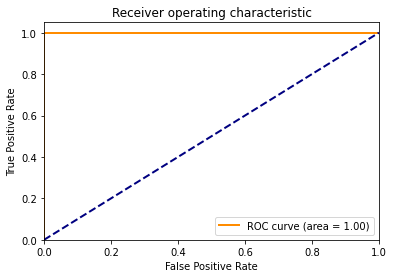

In [29]:
# ROC (Receiver Operating Characteristic) 
 # The ROC (Receiver Operating Characteristic) curve is a plot of the true positive rate (TPR) against the false positive rate (FPR) at various classification thresholds.
  # In the context of a binary classification problem like predicting the presence or absence of an illness, the TPR is the proportion of actual positive cases that are correctly 
  # identified as positive by the model (i.e., the number of true positives divided by the sum of true positives and false negatives), and the FPR is the proportion of actual negative 
  # cases that are incorrectly identified as positive by the model (i.e., the number of false positives divided by the sum of false positives and true negatives).

y_score = clf.decision_function(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## Desicion Trees

In [30]:
df = pd.read_csv('/content/MachineLearning_EM23/Training.csv') #Importar el csv desde mi repositorio en Guthub

In [ ]:
# Sets de datos de los pacientes que dado unos síntomas tienen (1) o no tienen  (0) diabetes
# Train = 3445 pacientes - 70%
# Test  = 1475 pacientes - 30%

df_train = pd.read_csv('/content/MachineLearning_EM23/Tarea06_ML_Febrero_AprendizajeSupervisado/training_Tarea06.csv') 
df_test = pd.read_csv('/content/MachineLearning_EM23/Tarea06_ML_Febrero_AprendizajeSupervisado/Testing_Tarea06.csv') 

# Partir mis datos en entrenamiento y test

# Entrenamiento 
# Variables predictoras (síntomas)
x_train = df_train.drop('prognosis', axis=1) 

# Variable de interés. Presencia o ausencia de diabetes
y_train = df_train.prognosis 


#Test 
# Variables predictoras (síntomas)
x_test = df_test.drop('prognosis', axis=1) 

# Variable de interés. Presencia o ausencia de diabetes
y_test = df_test.prognosis 

# Importar librebría necesario para la clasificación de desición de árbol
from sklearn.tree import DecisionTreeClassifier
     

# dtc se declara como una clase de la funcion importada
# XXXXXXXXXXXXXXXXXX que significa depth y random state  ZXXXXXXXXXXXXXXXXXXXXXXXXX

dtc = DecisionTreeClassifier(max_depth=5)

# fit del árbol de desición
dtc.fit(x_train, y_train)

In [32]:
# Predicción basado en el el entremaineto del modelo, utilizando las variables de test para predecir el resultado de y del data set de test. 
y_pred = dtc.predict(x_test)
     

# Evaluar el algoritmo con accuracy, presicion, recall y F1 score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1-score:', f1_score(y_test, y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
